<a href="https://colab.research.google.com/github/CharlesGignac-CRDIG/Partage/blob/main/Section_1_Fonctionalit%C3%A9s_de_base_de_geemap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import ee
import geemap
import geopandas as gpd

In [2]:
geemap.ee_initialize()

**CHARGEMENT D'UNE ENTITÉ DE TYPE IMAGE - GTOPO30, données globales d'élévation**

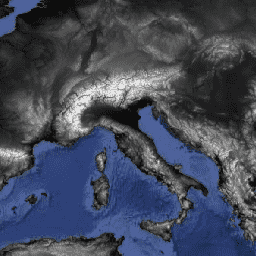

In [3]:
# Référence : https://developers.google.com/earth-engine/datasets/catalog/USGS_GTOPO30
image = ee.Image("USGS/GTOPO30")

In [4]:
# Pour voir les métadonnées simples de la couche image chargée, on peut l'appeler par son nom de variable.
image

Name,Description
elevation,Elevation


In [5]:
# Pour voir les métadonnées sous format JSON de la couche image chargée, on ajoute l'instruction getInfo() au nom de variable.
image.getInfo()

{'type': 'Image',
 'bands': [{'id': 'elevation',
   'data_type': {'type': 'PixelType',
    'precision': 'int',
    'min': -32768,
    'max': 32767},
   'dimensions': [43200, 21600],
   'crs': 'EPSG:4326',
   'crs_transform': [0.00833333333333,
    0,
    -180,
    0,
    -0.00833333333333,
    89.99999999994]}],
 'id': 'USGS/GTOPO30',
 'version': 1641990764759077,
 'properties': {'system:visualization_0_min': '-10.0',
  'type_name': 'Image',
  'keywords': ['dem',
   'elevation',
   'geophysical',
   'gtopo30',
   'nasa',
   'topography',
   'usgs'],
  'thumb': 'https://mw1.google.com/ges/dd/images/USGS_GTOPO30_thumb.png',
  'description': '<p>GTOPO30 is a global digital elevation model (DEM) with\na horizontal grid spacing of 30 arc seconds (approximately 1 kilometer).\nThe DEM was derived from several raster and vector sources of topographic\ninformation.  Completed in late 1996, GTOPO30 was developed over\na three-year period through a collaborative effort led by the U.S.\nGeological

**CHARGEMENT D'UNE ENTITÉ DE TYPE IMAGECOLLECTION - Réflectances de surface Sentinel-2**

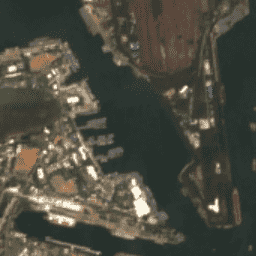

In [6]:
# Référence : https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S2_SR_HARMONIZED
collection = ee.ImageCollection("COPERNICUS/S2_SR_HARMONIZED")

In [7]:
# Pour voir les métadonnées simples de la collection chargée, on peut l'appeler par son nom de variable, mais on doit circonscrire la collection à un nombre limité d'éléments grâce à l'opérateur "limit(n)"
collection.limit(1)

Name,Description
B1,Aerosols
B2,Blue
B3,Green
B4,Red
B5,Red Edge 1
B6,Red Edge 2
B7,Red Edge 3
B8,NIR
B8A,Red Edge 4
B9,Water vapor


**CRÉATION D'UNE ENTITÉ DE TYPE GEOMETRY - Point aux coordonnées du pavillon Ringuet**

In [8]:
# Les coordonnées géographiques du pavillon Ringuet de l'Université du Québec à Trois-Rivières (UQTR) sont approximativement les suivantes - Latitude : 46.34764266714028 - Longitude : -72.57617087988571
point = ee.Geometry.Point([-72.57617087988571, 46.34764266714028])

In [9]:
# Pour voir les métadonnées simples de la géométrie chargée, on peut l'appeler par son nom de variable.
point

ee.Geometry({
  "functionInvocationValue": {
    "functionName": "GeometryConstructors.Point",
    "arguments": {
      "coordinates": {
        "constantValue": [
          -72.57617087988571,
          46.34764266714028
        ]
      }
    }
  }
})

**CRÉATION D'UNE ENTITÉ DE TYPE FEATURE - Point aux coordonnées de L'UQTR avec attributs**

> Bloc en retrait



In [10]:
# Pour que cette étape se complète sans erreur, il faut que la géométrie "point" soit préalablement définie.
pointFeature = ee.Feature(point, {'Numérique':42, 'Textuel':'Trois-Rivières'})

In [11]:
# Pour voir les métadonnées simples de l'entité chargée, on peut l'appeler par son nom de variable.
pointFeature

▶ *On peut alors interroger les attributs de la donnée "Feature" grâce à l'opérateur .get('attribut')*

In [12]:
textuel = pointFeature.get('Textuel')
textuel

**CRÉATION D'UNE ENTITÉ DE TYPE FEATURECOLLECTION - Les empreintes des pavillons de L'UQTR utilisés lors du congrès de L'AQT 2023**

▶ On peut créer une FeatureCollection à partir de features *existants*

In [13]:
Liste =  [ee.Feature(ee.Geometry.Point(-72.553844,46.362309), {'Numérique':42, 'Textuel':'Trois-Rivières'}), ee.Feature(ee.Geometry.Point(-71.208000,46.813900), {'Numérique':43, 'Textuel':'Québec'})]
featureCollection =  ee.FeatureCollection(Liste)

In [14]:
featureCollection

▶ Mais, tirons profit de la capacité de numérisation manuelle de geemap pour délimiter les pavillons Ringuet, Léon-Provencher et La Chasse-Galerie.

In [15]:
# D'abord, il faut créer un interface cartographique.
Map = geemap.Map()

In [16]:
# Ensuite, extrayons la latitude et la longitude de l'entité pointFeature.
lon, lat = point.coordinates().getInfo()

In [17]:
# APPROCHE #1 : Centrons la carte sur le Pavillon Ringuet de l'UQTR grâce à la latitude et la longitude extraites et fixons le niveau de zoom à 8.
Map.setCenter(lat,lon,zoom=18)

In [19]:
# APPROCHE #2 : Centrons la carte sur le Pavillon Ringuet de l'UQTR grâce à la variable pointFeature et fixons le niveau de zoom à 8.
Map.centerObject(pointFeature,zoom=18)

▶ Créons une FeatureCollection en mode graphique

In [32]:
Map

Map(bottom=23781483.0, center=[46.34764228572119, -72.57617175579072], controls=(WidgetControl(options=['posit…

In [20]:
Map.draw_features

[]

In [47]:
# Numérisez les pavillons Provancher, Ringuet et La Chasse-Galerie.
# On récupère les entités numérisées sur la carte pour les stocker vers une liste.
roi_list = Map.draw_features
print(roi_list)
print(type(roi_list))

[]
<class 'list'>


In [22]:
# On convertit la liste vers une FeatureCollection
batiments = ee.FeatureCollection(roi_list)

In [48]:
# Remarquez que les entités de la collection n'ont pas d'attribut permettant de les identifier.
batiments

In [57]:
# La manière la plus simple d'assigner une nouvelle colonne est de passer la FeatureCollection vers un format geodataframe (geopandas).
gdf = geemap.ee_to_geopandas(batiments)
noms = ['Léon-Provancher', 'Ringuet', 'La Chasse-Galerie']
gdf['Nom'] = noms
gdf

,geometry,Nom
0,"POLYGON ((-72.57725 46.34778, -72.57622 46.347...",Léon-Provancher
1,"POLYGON ((-72.57666 46.34739, -72.57588 46.347...",Ringuet
2,"POLYGON ((-72.57744 46.34854, -72.57725 46.348...",La Chasse-Galerie


▶ Ajoutons la FeatureCollection créée sur la carte

In [31]:
# Il y a une différence entre le dessin de géométries sur la carte et l'affichage de données.
# Retirons les géométries dessinées (manuellement) et ajoutons la donnée sur les bâtiments à la carte.
Map

Map(bottom=23781483.0, center=[46.34764228572119, -72.57617175579072], controls=(WidgetControl(options=['posit…

In [33]:
Map.addLayer(batiments,{},'Pavillons UQTR-AQT 2023')